# Convolution Tests

In [1]:
import numpy as np
from scipy.ndimage import convolve, correlate

import convolution

In [2]:
X = np.array(
    [
        [1 , 2 , 3 , 4 , 5 , 6 , 7 ],
        [8 , 9 , 10, 11, 12, 13 ,14],
        [15, 16, 17, 18, 19, 20, 21],
        [22, 23, 24, 25, 26, 27, 28]
    ]
    )
K = np.array(
    [[0, -1, 0],
     [-1, 4, -1],
     [0 ,-1, 0]])

print("X:")
print(X)

X:
[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]]


In [3]:
crop  = (2, 2)
dim_e = convolution.get_dim_ext(K.shape, crop)
er, ec = dim_e

print(crop)
print(dim_e)

(2, 2)
(1, 1)


Compare with Scipy routine

In [4]:
convolution.convolve2d(X, K, crop, edge_mode="constant", edge_params=[2])

array([[-10.,  -7.,  -6.,  -5.,  -4.,  -3.,   4.],
       [  5.,   0.,   0.,   0.,   0.,   0.,  13.],
       [ 12.,   0.,   0.,   0.,   0.,   0.,  20.],
       [ 46.,  28.,  29.,  30.,  31.,  32.,  60.]])

In [5]:
convolve(X, K, mode="constant", cval = 2) #scipy convolve

array([[-10,  -7,  -6,  -5,  -4,  -3,   4],
       [  5,   0,   0,   0,   0,   0,  13],
       [ 12,   0,   0,   0,   0,   0,  20],
       [ 46,  28,  29,  30,  31,  32,  60]])

1dim array * 1dim array = matrix generation

In [6]:
x = np.array([[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]])
y = np.array(
    [[0],[1],[0],[1],[0],[1],[0],[1],[0],[1], [0]])
d = convolution.convolve2d(x, y, (1,1), edge_mode="constant", edge_params=[0])
print(x.shape, y.shape, "->", d.shape)


(1, 11) (11, 1) -> (11, 11)


In [7]:
d

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

---

In [41]:
import numpy as np
import convolution

from pprint import pprint

In [9]:
#m =8
#k = 3
#=======
k = 5
m = 2*k-1
sample_h = np.arange(k) +1
print(sample_h)

[1 2 3 4 5]


In [10]:
convolution._vec2sub_toeplitz(sample_h, m)

array([[1., 2., 3., 4., 5., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4., 5., 0., 0., 0.],
       [0., 0., 1., 2., 3., 4., 5., 0., 0.],
       [0., 0., 0., 1., 2., 3., 4., 5., 0.],
       [0., 0., 0., 0., 1., 2., 3., 4., 5.]])

In [61]:
N =8
X = np.arange(N*N).reshape(N,N)
crop = (2, 2)
l = 2*crop[0]-1
k = 2*crop[1]-1
K = (1+np.arange(l*k)).reshape(l,k)
n1,m1 = X.shape

dim_conv = convolution.get_dim_convole((n1,m1),(l,k),crop)
er, ec = convolution.get_dim_ext((l, k), crop)

In [62]:
er, ec

(1, 1)

In [63]:
X_ext = convolution._expand_matrix(X, (er, ec), ["constant", 0])
X_ext

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  0.],
       [ 0.,  8.,  9., 10., 11., 12., 13., 14., 15.,  0.],
       [ 0., 16., 17., 18., 19., 20., 21., 22., 23.,  0.],
       [ 0., 24., 25., 26., 27., 28., 29., 30., 31.,  0.],
       [ 0., 32., 33., 34., 35., 36., 37., 38., 39.,  0.],
       [ 0., 40., 41., 42., 43., 44., 45., 46., 47.,  0.],
       [ 0., 48., 49., 50., 51., 52., 53., 54., 55.,  0.],
       [ 0., 56., 57., 58., 59., 60., 61., 62., 63.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [64]:
n,m = X_ext.shape

In [65]:
H_i = convolution._vec2sub_toeplitz(K[0], m1)
H_i

array([[1., 2., 3., 0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 0., 0., 0., 0.],
       [0., 0., 1., 2., 3., 0., 0., 0.],
       [0., 0., 0., 1., 2., 3., 0., 0.],
       [0., 0., 0., 0., 1., 2., 3., 0.],
       [0., 0., 0., 0., 0., 1., 2., 3.]])

In [66]:
H_i[:, ec:-ec]

array([[2., 3., 0., 0., 0., 0.],
       [1., 2., 3., 0., 0., 0.],
       [0., 1., 2., 3., 0., 0.],
       [0., 0., 1., 2., 3., 0.],
       [0., 0., 0., 1., 2., 3.],
       [0., 0., 0., 0., 1., 2.]])

In [67]:
X_ext.shape

(10, 10)

In [68]:
A, x =convolution.convolve2toeplitz(
    X,
    K,
    crop = crop,
    vaildation = True)
A2, x2 =convolution.convolve2toeplitz(
    X,
    K,
    crop = crop,
    vaildation = False)

In [69]:
pprint(A2)
pprint(A)

array([[1., 2., 3., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 9., 0., 0.],
       [0., 0., 0., ..., 8., 9., 0.],
       [0., 0., 0., ..., 7., 8., 9.]])
array([[5., 6., 0., ..., 0., 0., 0.],
       [4., 5., 6., ..., 0., 0., 0.],
       [0., 4., 5., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 6., 0.],
       [0., 0., 0., ..., 4., 5., 6.],
       [0., 0., 0., ..., 0., 4., 5.]])


In [70]:
X.shape

(8, 8)

In [71]:
A.shape

(64, 64)

In [28]:
R = A.dot(x).reshape(dim_conv)
print(R.shape)
R

(6, 7)


array([[520., 742., 603., 590., 577., 666., 377.],
       [302., 444., 282., 274., 266., 380., 185.],
       [246., 360., 226., 218., 210., 296., 143.],
       [190., 276., 170., 162., 154., 212., 101.],
       [134., 192., 114., 106.,  98., 128.,  59.],
       [ 72.,  98.,  43.,  30.,  17.,  22.,  -1.]])

In [57]:
convolution.convolve2d(X, K, crop, edge_mode="constant", edge_params=[0])

array([[   0.,   -1.,   -3.,   -6.,  -10.,  -14.,  -18.,  -15.,  -11.,
          -6.],
       [  -7.,  -16.,  -22.,  -25.,  -23.,  -21.,  -19.,    4.,   -6.,
         -19.],
       [ -21.,  -10.,    8.,   -2.,    6.,   14.,   22.,   72.,   20.,
         -39.],
       [ -42.,   17.,   82.,   48.,   52.,   56.,   60.,  134.,   37.,
         -66.],
       [ -70.,   31.,  138.,   76.,   80.,   84.,   88.,  190.,   51.,
         -94.],
       [ -98.,   45.,  194.,  104.,  108.,  112.,  116.,  246.,   65.,
        -122.],
       [-126.,   59.,  250.,  132.,  136.,  140.,  144.,  302.,   79.,
        -150.],
       [-105.,  172.,  456.,  362.,  370.,  378.,  386.,  520.,  202.,
        -123.],
       [ -77.,   54.,  188.,  115.,  117.,  119.,  121.,  214.,   64.,
         -89.],
       [ -42.,  -85., -129., -174., -178., -182., -186., -141.,  -95.,
         -48.]])

In [59]:
def get_matrix_system(data, filter):
    n,m = data.shape
    l, k= filter.shape

    if k != 2*m-1 or l != 2*n-1:
        raise ValueError("Invaild dimension: l, k must be 2n-1, 2m-1")
    
    rows = []
    for i in range(0, n):
        row_i = n-1-i
        row_f = 2*n-1-i

        for j in range(0, m):
            column_i = m-1 -j
            column_f = 2*m-1 -j

            #print(row_i, row_f)
            #print(column_i, column_f)

            t = filter[row_i : row_f, column_i:column_f]

            #print(t.shape)
            rows.append(t.flatten())

    #mat = np.vstack(rows)
    return rows, data.flatten()

In [58]:
K = np.array(
    [[-0, 0, 0, 0, 0],
     [-0, 4, 4, 4, 0],
     [-0, 4,  8, 4, 0],
     [-0, 4, -1, 4, 0],
     [-0, 0, 0, 0, 0]])
l, k = K.shape
n = 3
m = 3
X = np.arange(9).reshape(3,3)

---

In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..\..")
from scipy.ndimage import convolve
from scipy.optimize import least_squares, nnls
import numpy as np
from matplotlib import pyplot as plt

from uilc import PositionArray
from uilc.utils import radiation
import convolution

In [37]:
s= 10
H = 0.1
W= 0.3
Wx = 0.2
Wy = 0.12


In [38]:
n=80
k = 2*n-1
d = lambda i, j, n: (n/2-i)**2 + (n/2-j)**2
dw = W/n

In [39]:
filter =np.fromfunction(lambda i, j: radiation.lambertian(0, (dw) *np.sqrt(d(i, j, k)), s, H), (k,k), dtype=float)
distribution = np.where(np.random.rand(*(k, k)) >= 0.98, 1, 0)
intensity = convolve(distribution, filter, mode='constant', cval=0.0)

In [40]:
filter.shape

(159, 159)

In [41]:
A = convolution.get_matrix_system(filter, (n, n))
if np.fabs(np.linalg.det(A)) < 1E-100000:
    pass
else: 
    dim_l = A.shape[0]
    const = np.ones(shape=(dim_l,))
    sol = nnls(A, const)[0]

In [42]:
sol2d = sol.reshape((n,n))
sol2d = sol2d/sol2d.max()
illumination = convolve(sol2d, filter, mode='constant', cval=0.0)

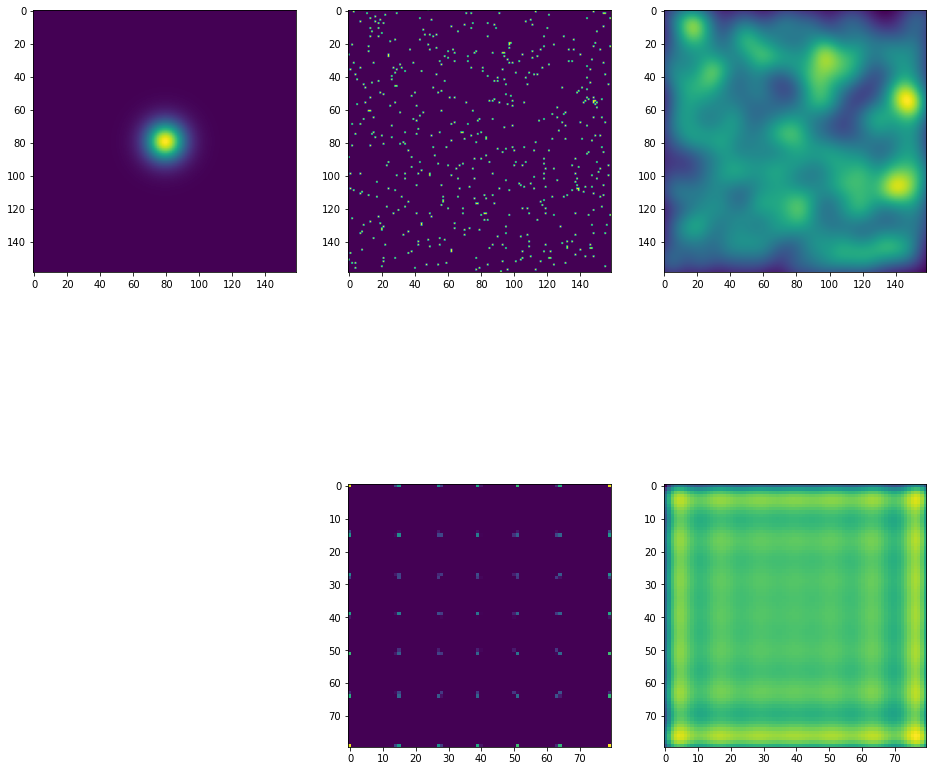

In [43]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2, 3, 1)# filter
ax2 = fig.add_subplot(2, 3, 2)# distribution
ax3 = fig.add_subplot(2, 3, 3)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.imshow(filter)
ax2.imshow(distribution)
ax3.imshow(intensity)
ax5.imshow(sol2d)
ax6.imshow(illumination)
plt.show()

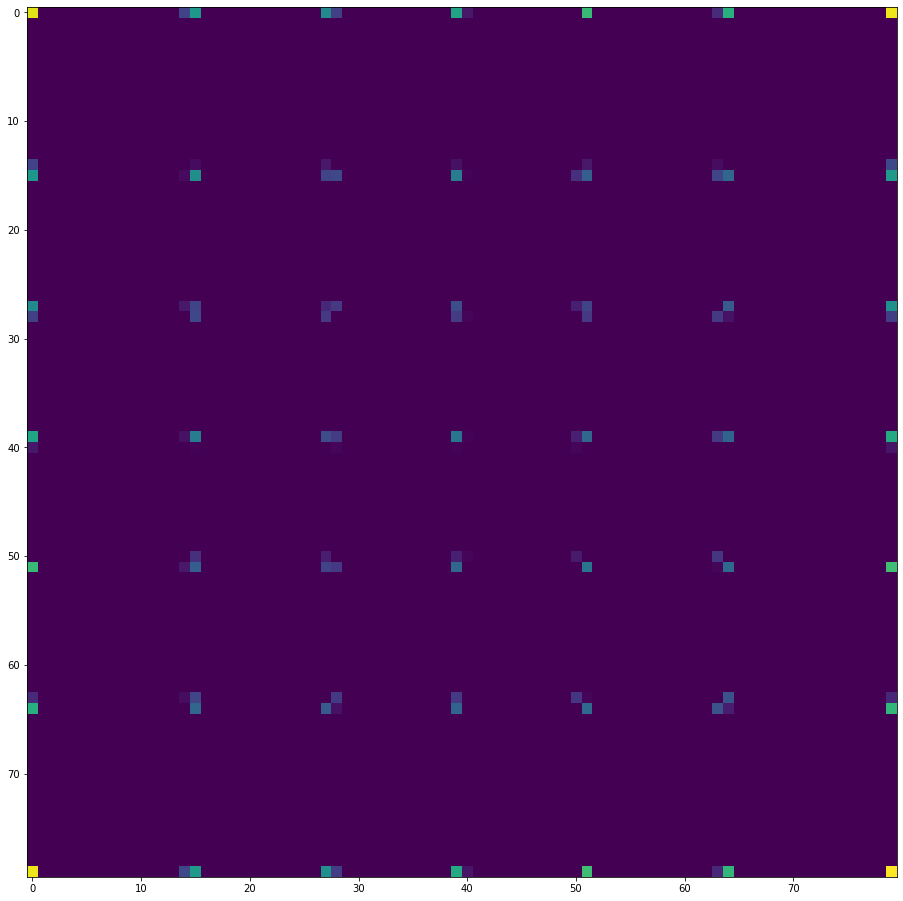

In [44]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot()
ax.imshow(sol2d)
plt.show()

In [9]:
illumination.min()

124.46303667842437

In [32]:
illumination = illumination/illumination.max()

In [33]:
illumination.min()

0.8281709758450234

In [34]:
illumination.std()

0.012010179030070674